# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import resample

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Data

In [ ]:
#importing the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart_disease_health_indicators_BRFSS2015.csv")

In [ ]:
#seeing how our dataset looks like using first five rows
df.head()



,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
#shape of the dataframe
df.shape

(253680, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
#checking for the null values
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
#Replacing null values in numerical columns with their mean
for column in df:
    if df[column].dtype == 'float64':
        df[column].fillna(value = df[column].mean(), inplace = True)
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# EDA

In [ ]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
catcol = ['', 'HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Education',
       'Income']

<Axes: xlabel='BMI', ylabel='Count'>

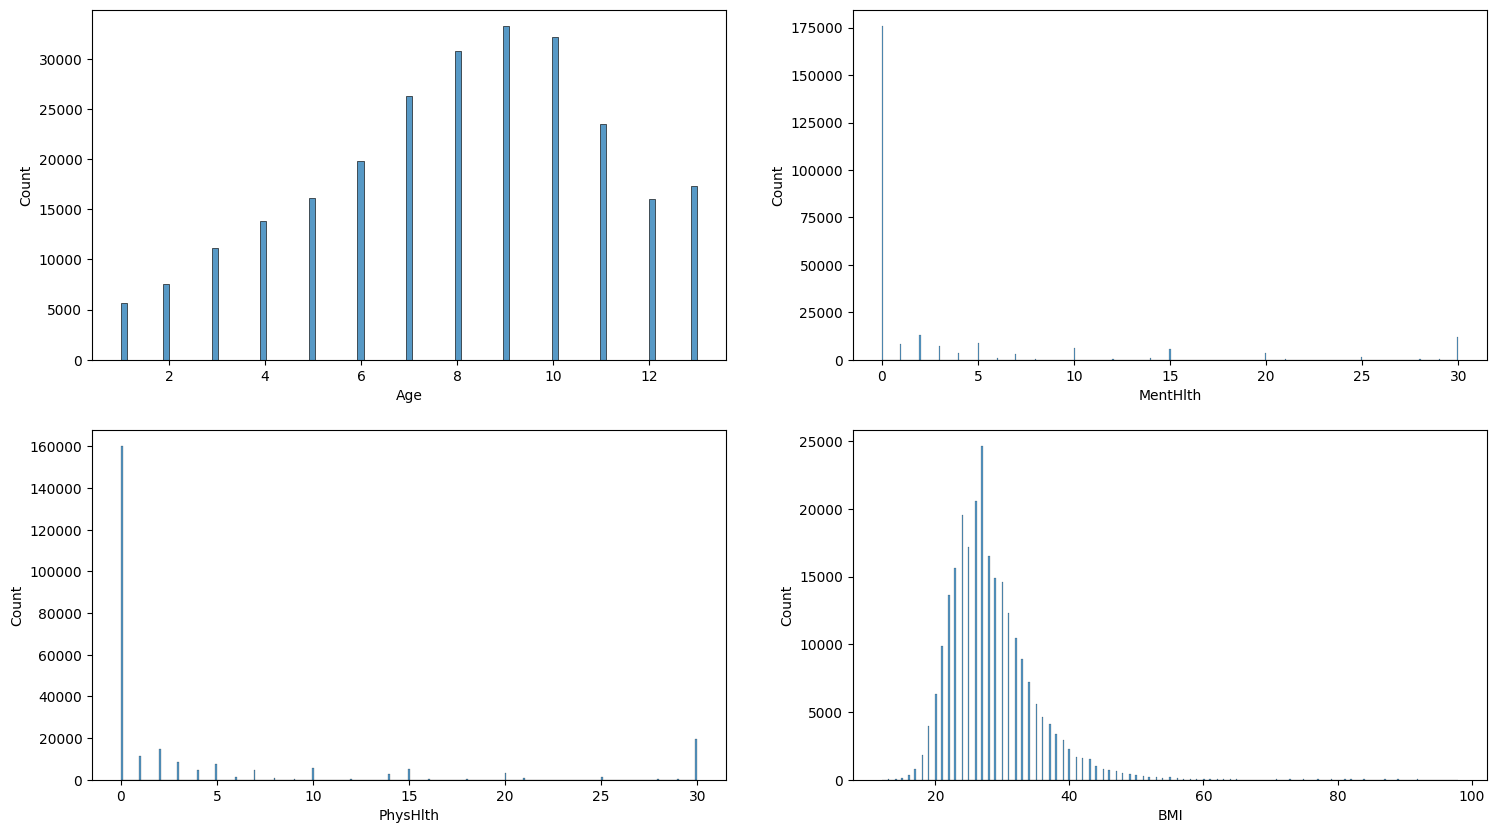

In [ ]:
distcol = ['Age', 'MentHlth', 'PhysHlth', 'BMI']
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0,0], data=df, x=distcol[0])
sns.histplot(ax=axes[0,1], data=df, x=distcol[1])
sns.histplot(ax=axes[1,0], data=df, x=distcol[2])
sns.histplot(ax=axes[1,1], data=df, x=distcol[3])

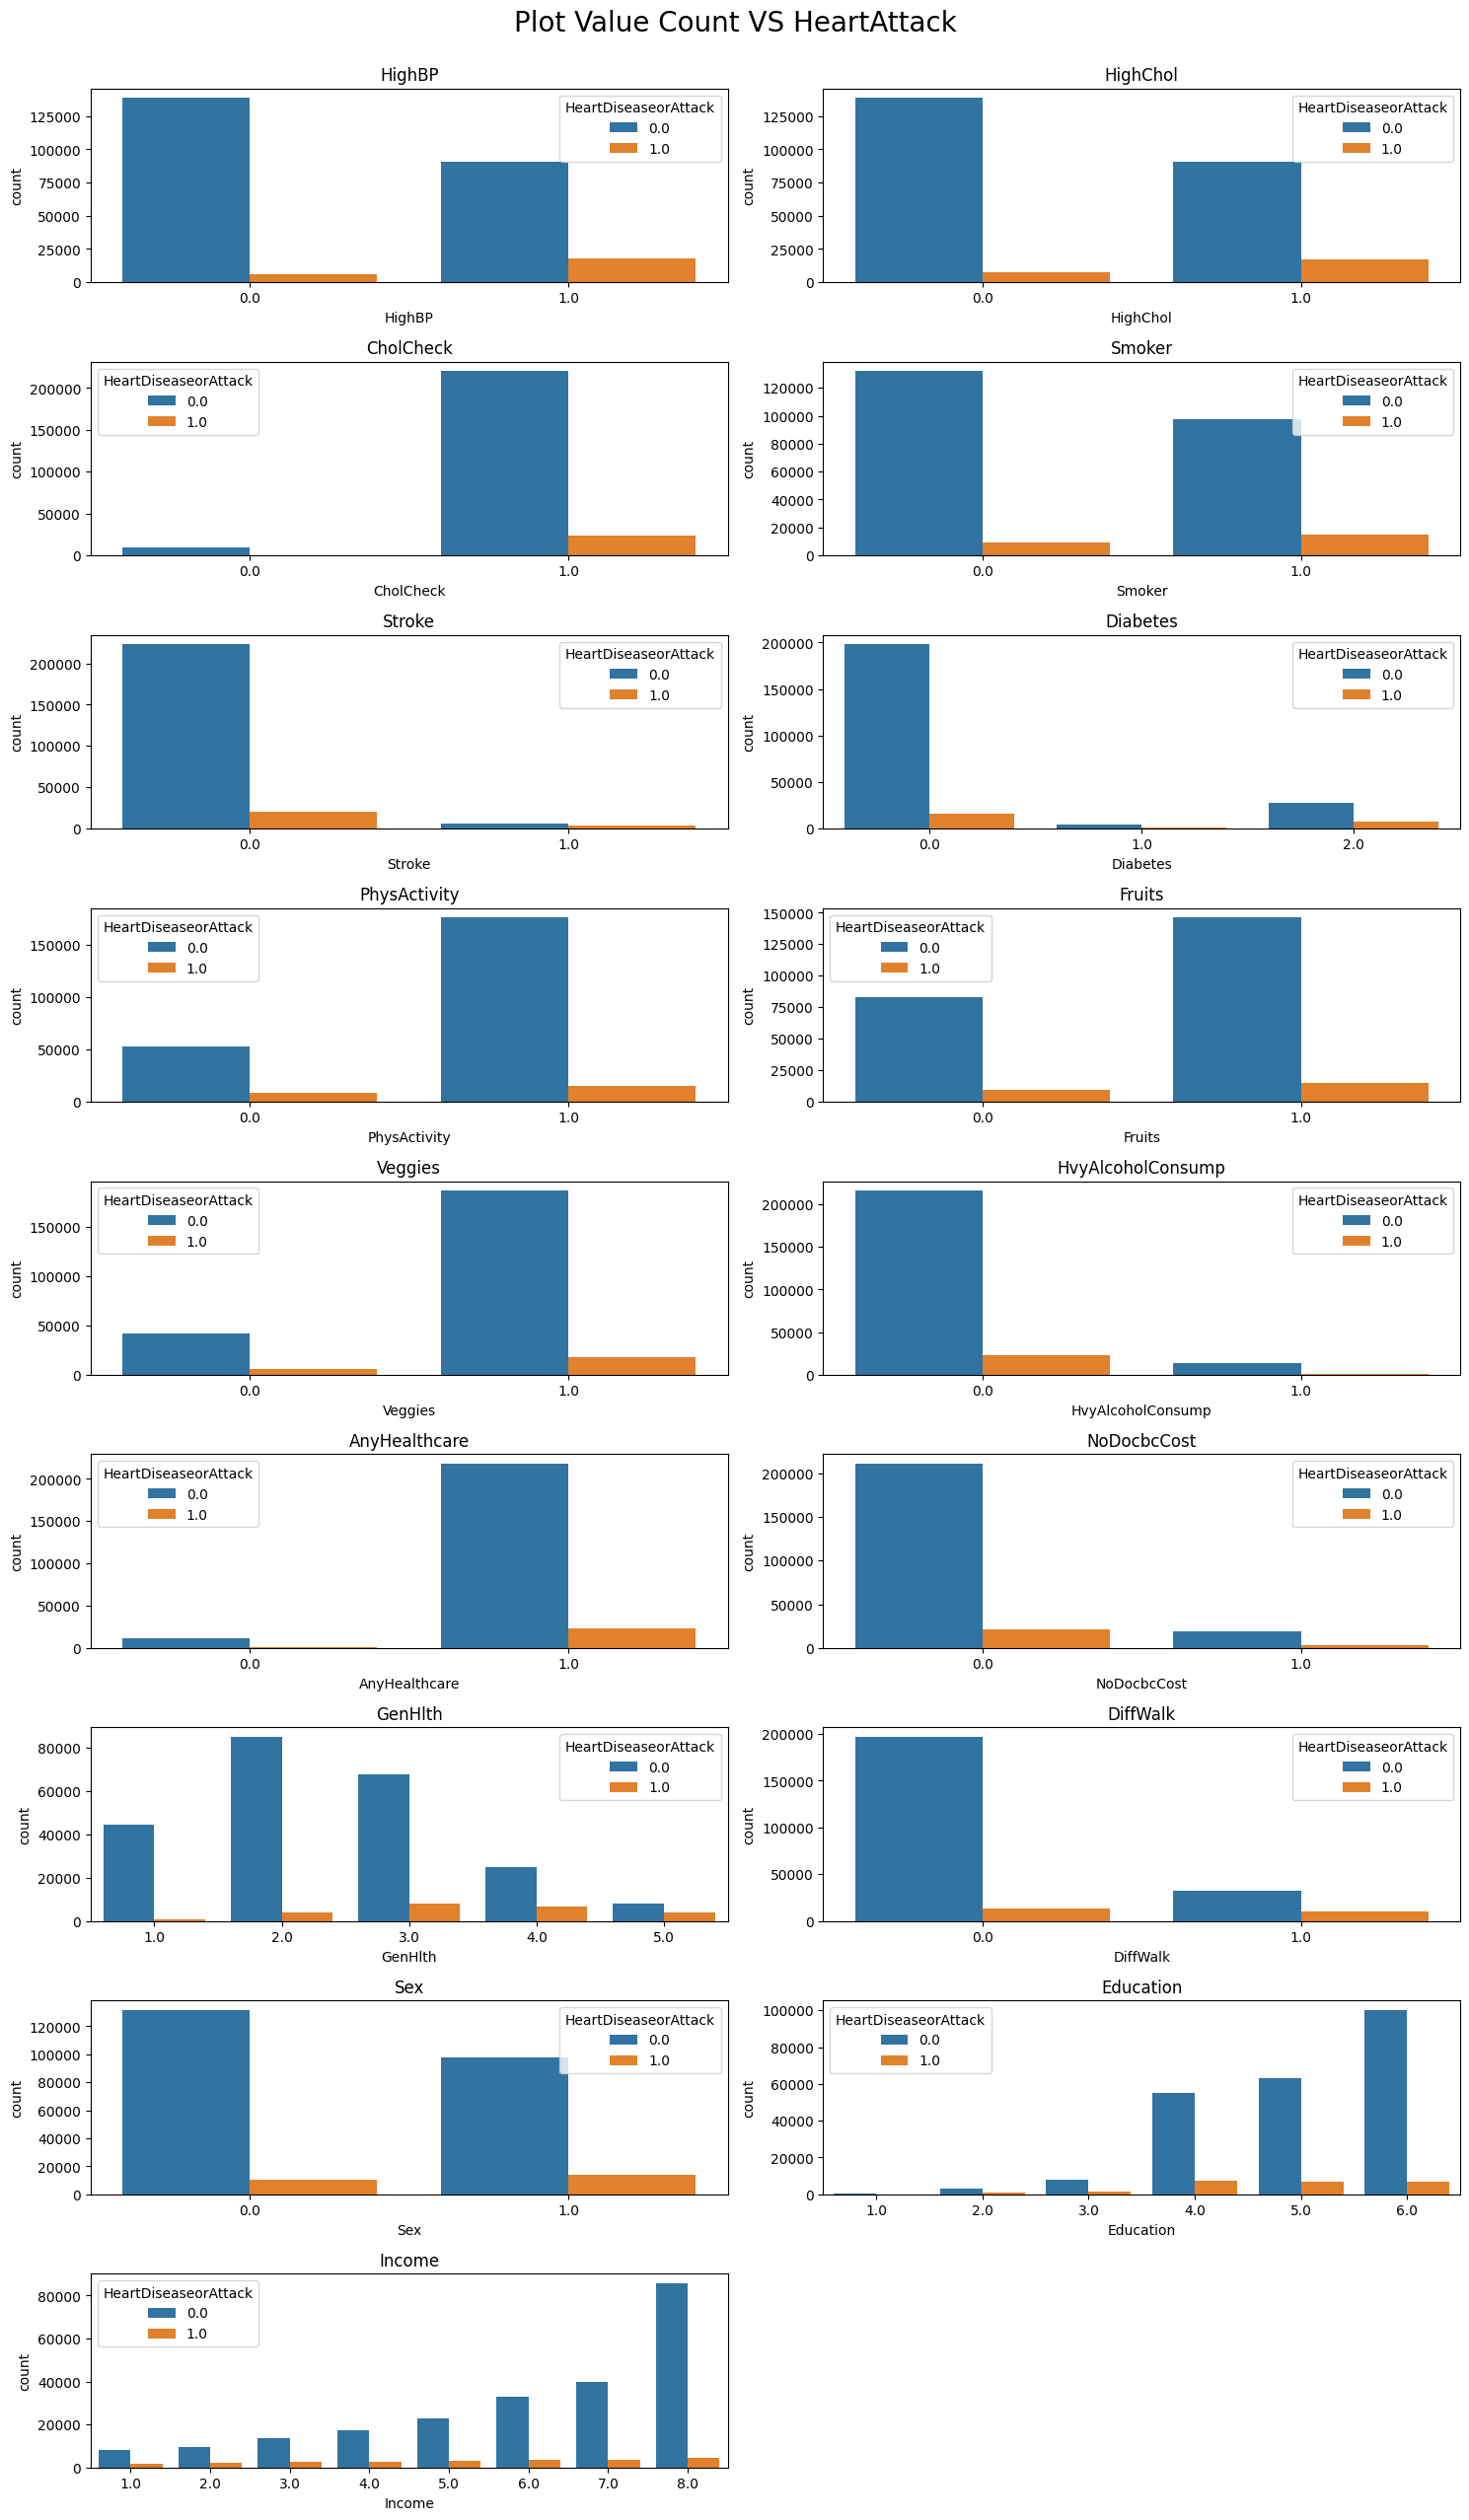

In [ ]:
plt.figure(figsize=(15,50))
for i,column in enumerate(catcol[1:]):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='HeartDiseaseorAttack')
    plt.title(f"{column}")
    plt.tight_layout()

In [ ]:
bincol = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
         'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

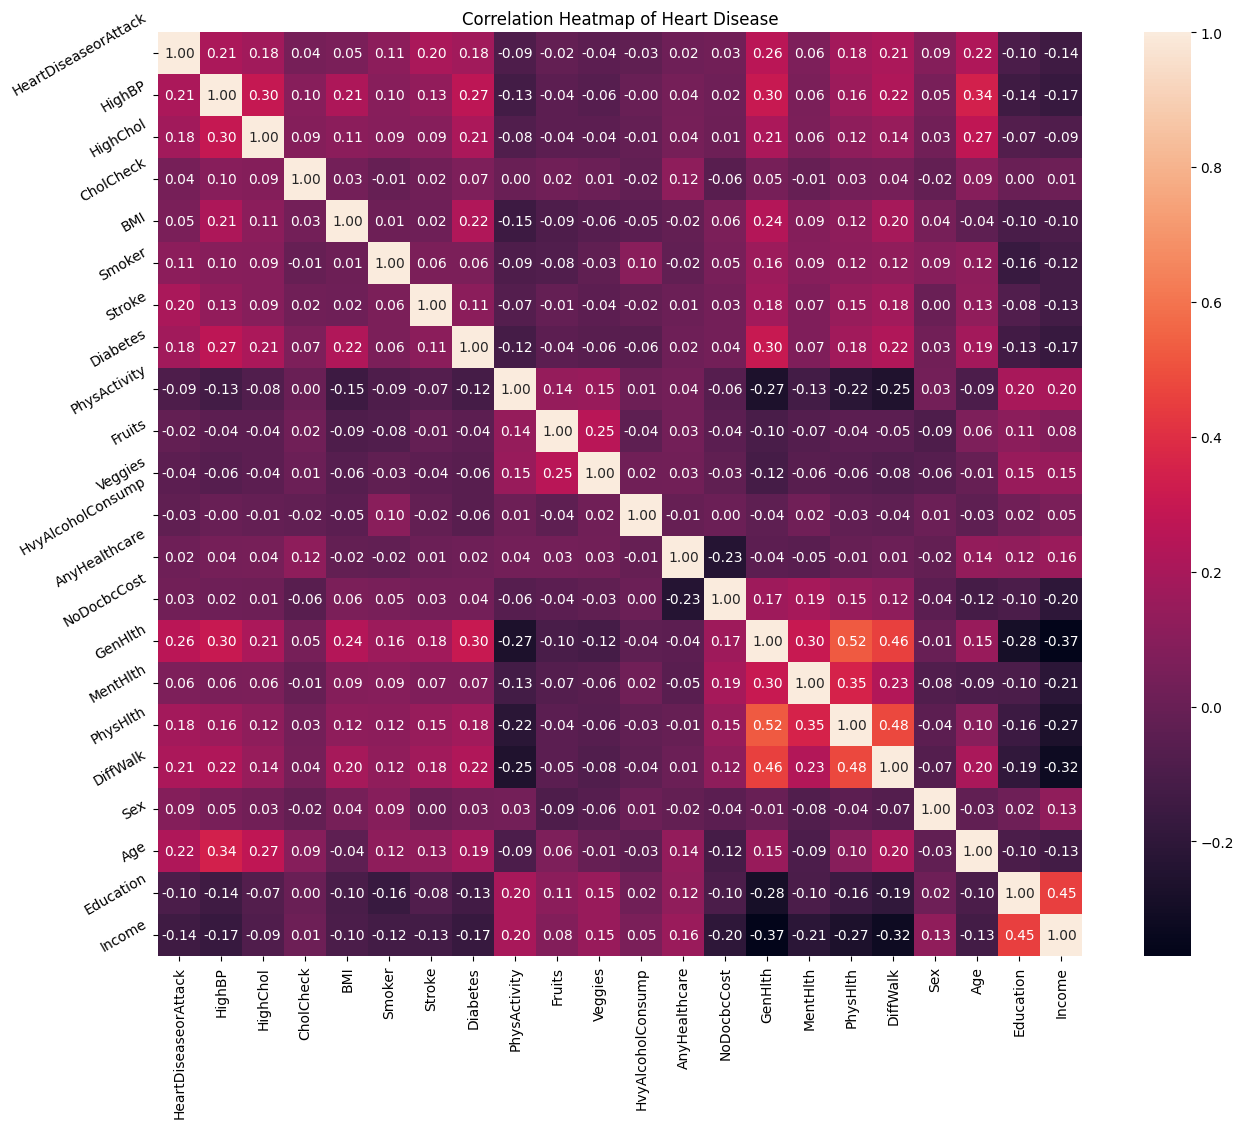

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Disease')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()

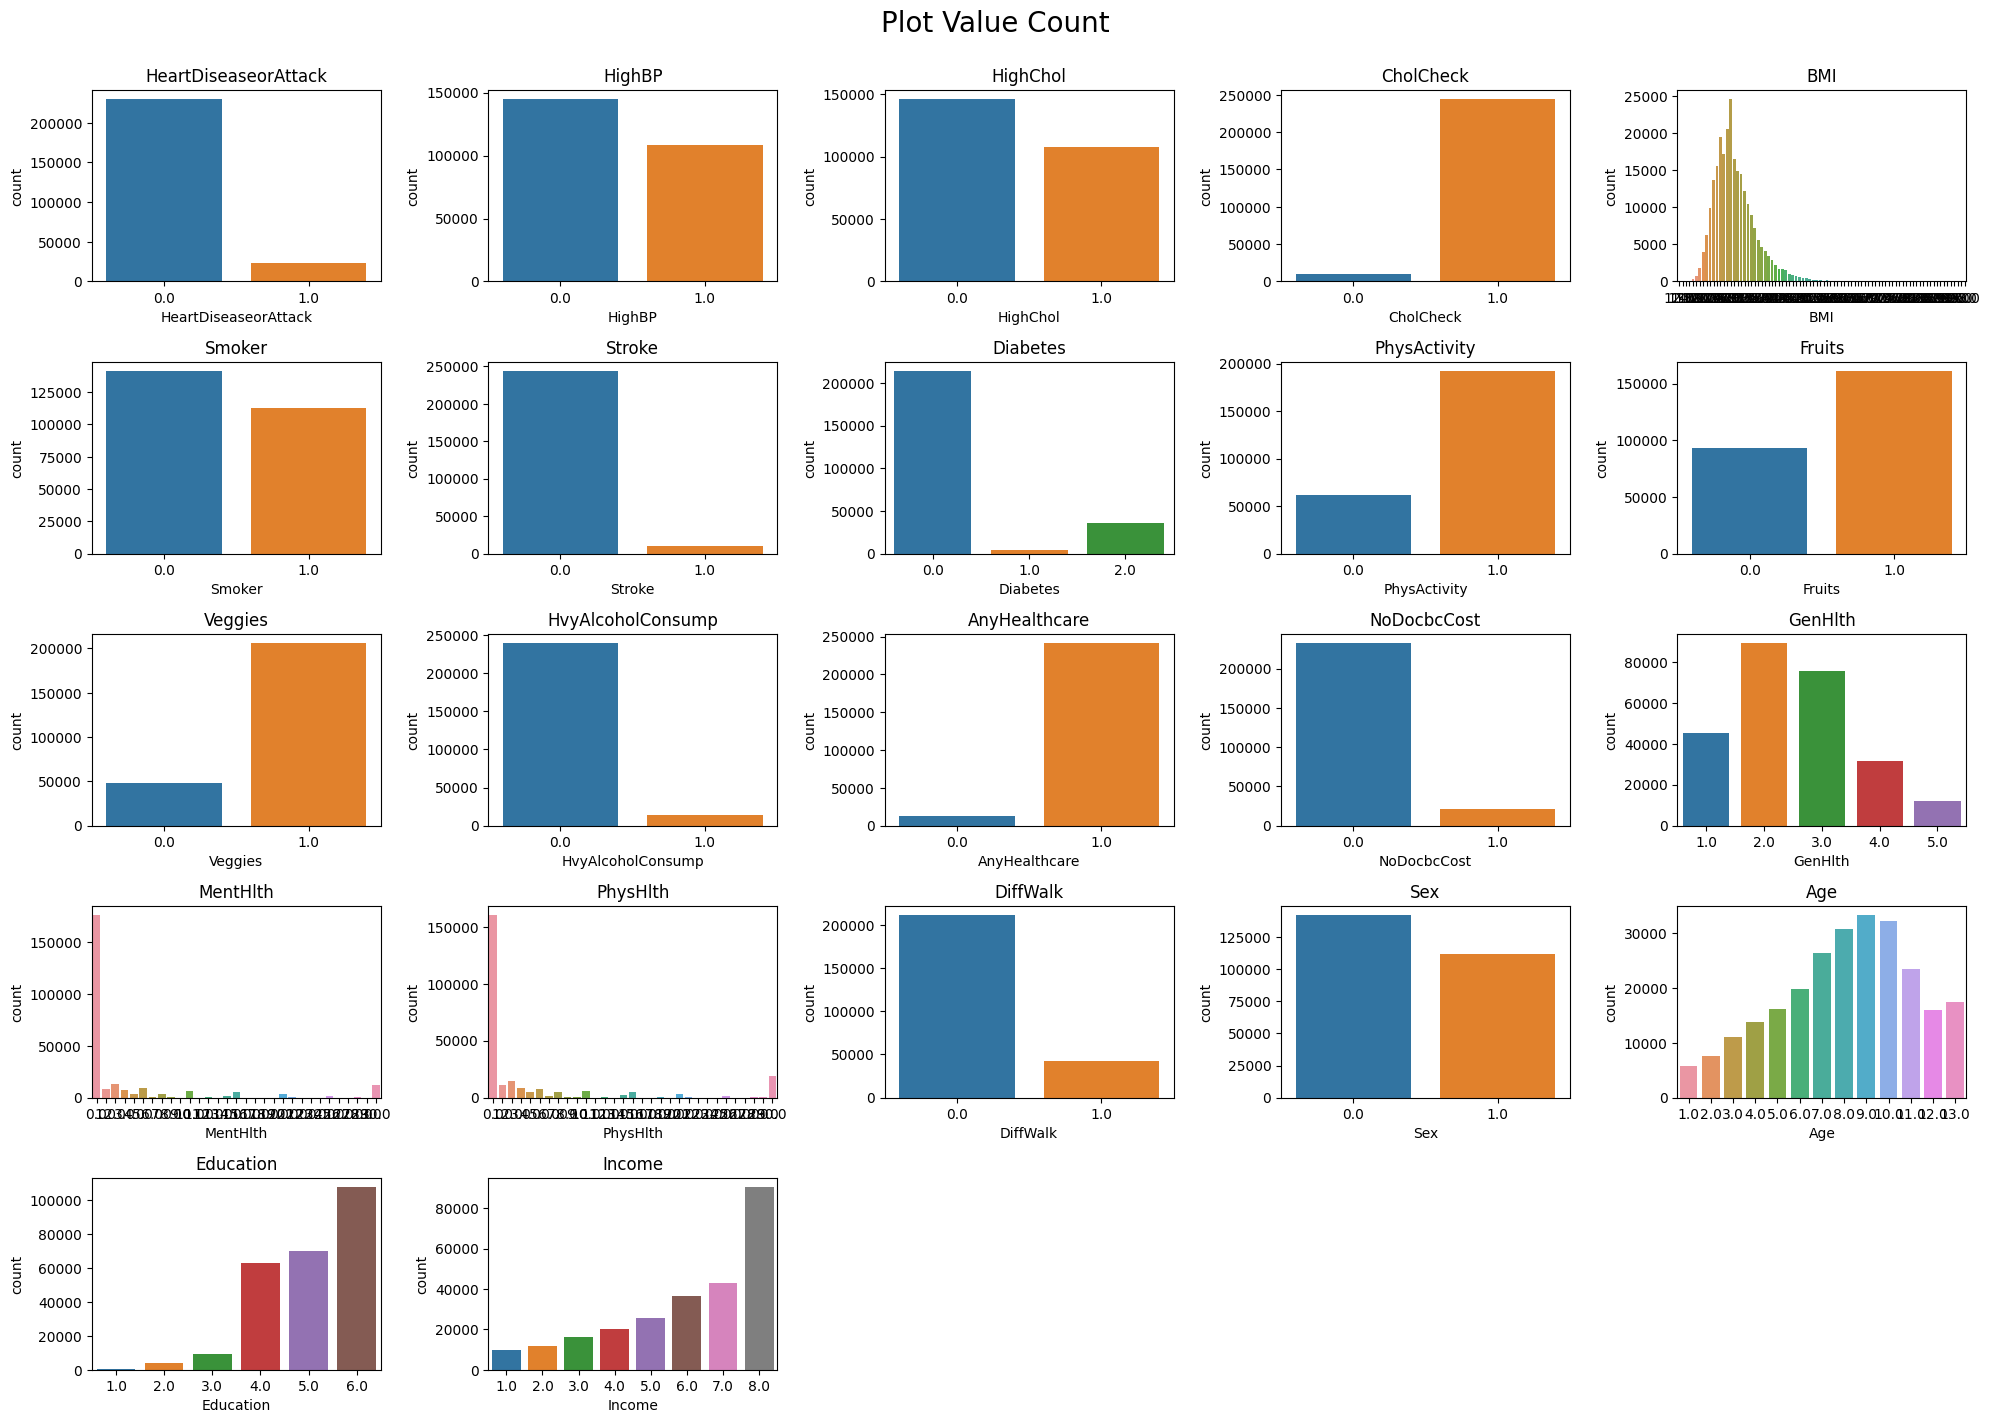

In [ ]:
# Countplot on each feature
plt.figure(figsize=(20,60))
for i,column in enumerate(df.columns):
    plt.subplot(len(df.columns), 5, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

In [ ]:
#data statistics
cor_matrix = df.corr().abs()
cor_matrix

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,0.087299,0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,0.099600,0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,0.125267,0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,0.141358,0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,0.078046,0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,0.070802,0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,0.058255,0.046589,0.008366,0.031775,0.040585,0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,0.147294,0.087518,...,0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,0.036618,0.103932,0.100069
Smoker,0.114441,0.096991,0.091299,0.009929,0.013804,1.000000,0.061173,0.062914,0.087401,0.077666,...,0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,0.161955,0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,0.069151,0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,0.076009,0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,0.121947,0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,0.130517,0.171483
PhysActivity,0.087299,0.125267,0.078046,0.004190,0.147294,0.087401,0.069151,0.121947,1.000000,0.142756,...,0.035505,0.061638,0.266186,0.125587,0.219230,0.253174,0.032482,0.092511,0.199658,0.198539
Fruits,0.019790,0.040555,0.040859,0.023849,0.087518,0.077666,0.013389,0.042192,0.142756,1.000000,...,0.031544,0.044243,0.103854,0.068217,0.044633,0.048352,0.091175,0.064547,0.110187,0.079929


In [ ]:
#remove duplicate correlation diagonal
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
upper_tri

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,NaN,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,0.087299,0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,0.099600,0.141011
HighBP,NaN,NaN,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,0.125267,0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,0.141358,0.171235
HighChol,NaN,NaN,NaN,0.085642,0.106722,0.091299,0.092620,0.209085,0.078046,0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,0.070802,0.085459
CholCheck,NaN,NaN,NaN,NaN,0.034495,0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,0.058255,0.046589,0.008366,0.031775,0.040585,0.022115,0.090321,0.001510,0.014259
BMI,NaN,NaN,NaN,NaN,NaN,0.013804,0.020153,0.224379,0.147294,0.087518,...,0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,0.036618,0.103932,0.100069
Smoker,NaN,NaN,NaN,NaN,NaN,NaN,0.061173,0.062914,0.087401,0.077666,...,0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,0.161955,0.123937
Stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107179,0.069151,0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,0.076009,0.128599
Diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121947,0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,0.130517,0.171483
PhysActivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142756,...,0.035505,0.061638,0.266186,0.125587,0.219230,0.253174,0.032482,0.092511,0.199658,0.198539
Fruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.031544,0.044243,0.103854,0.068217,0.044633,0.048352,0.091175,0.064547,0.110187,0.079929


In [ ]:
#drop both highly correlated columns
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7) or any(upper_tri[column] < 0.008)]
to_drop

['PhysActivity',
 'Veggies',
 'HvyAlcoholConsump',
 'NoDocbcCost',
 'DiffWalk',
 'Sex',
 'Education']

In [ ]:
#specify features and target columns
target = df['HeartDiseaseorAttack']
features = df.drop(to_drop, axis=1)
features = features.drop('HeartDiseaseorAttack',axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   HighBP         253680 non-null  float64
 1   HighChol       253680 non-null  float64
 2   CholCheck      253680 non-null  float64
 3   BMI            253680 non-null  float64
 4   Smoker         253680 non-null  float64
 5   Stroke         253680 non-null  float64
 6   Diabetes       253680 non-null  float64
 7   Fruits         253680 non-null  float64
 8   AnyHealthcare  253680 non-null  float64
 9   GenHlth        253680 non-null  float64
 10  MentHlth       253680 non-null  float64
 11  PhysHlth       253680 non-null  float64
 12  Age            253680 non-null  float64
 13  Income         253680 non-null  float64
dtypes: float64(14)
memory usage: 27.1 MB


In [ ]:
from sklearn.datasets import make_classification
# Generate a random classification dataset with imbalanced classes
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5,
                           n_redundant=5, weights=[0.9, 0.1], random_state=42)


In [ ]:
#Data Scaling

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine the training data into one array
training_data = np.hstack((X_train, y_train.reshape(-1, 1)))

# Separate the majority and minority classes
majority_class = training_data[training_data[:, -1] == 0]
minority_class = training_data[training_data[:, -1] == 1]
z=int(len(minority_class))
# Undersample the majority class to match the size of the minority class
undersampled_majority_class = resample(majority_class, n_samples=z, random_state=42)

# Combine the minority class and undersampled majority class into one array
undersampled_training_data = np.vstack((undersampled_majority_class, minority_class))

# Separate the features and target variable
X_undersampled_train = undersampled_training_data[:, :-1]
y_undersampled_train = undersampled_training_data[:, -1]


#KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


#creating our knn classifier model with n = 5
knn_value_5 = KNeighborsClassifier(n_neighbors = 5)
knn_value_5.fit(X_undersampled_train, np.ravel(y_undersampled_train,order='C'))

#Estimating the accuracy of knn classifier with 5 knn
print("Accuracy score ->", knn_value_5.score(X_test, y_test))

#creating confusion matrix
y_pred = knn_value_5.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

# compute and print the classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy score -> 0.9305
Confusion matrix
 [[1664  117]
 [  22  197]]
True Positives(TP) =  1664
True Negatives(TN) =  197
False Positives(FP) =  117
False Negatives(FN) =  22
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1781
           1       0.63      0.90      0.74       219

    accuracy                           0.93      2000
   macro avg       0.81      0.92      0.85      2000
weighted avg       0.95      0.93      0.94      2000



#Basic Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
Gnb = GaussianNB()
Gnb.fit(X_undersampled_train, y_undersampled_train)
y_pred = Gnb.predict(X_test)
print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test, y_pred))
print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

# compute and print the classification report
report = classification_report(y_test, y_pred)
print(report)

Naive Bayes Classifier Accuracy:  0.7745
Confusion matrix
 [[1664  117]
 [  22  197]]
True Positives(TP) =  1664
True Negatives(TN) =  197
False Positives(FP) =  117
False Negatives(FN) =  22
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1781
           1       0.30      0.77      0.43       219

    accuracy                           0.77      2000
   macro avg       0.63      0.77      0.64      2000
weighted avg       0.89      0.77      0.81      2000



#RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_undersampled_train, y_undersampled_train)
y_pred = rf.predict(X_test)
print("Random Forest Classifier Accuracy: ",accuracy_score(y_test, y_pred))

print('Confusion matrix:-', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

# compute and print the classification report
report = classification_report(y_test, y_pred)
print(report)

Random Forest Classifier Accuracy:  0.923
Confusion matrix:- [[1664  117]
 [  22  197]]
True Positives(TP) =  1664
True Negatives(TN) =  197
False Positives(FP) =  117
False Negatives(FN) =  22
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1781
           1       0.60      0.91      0.72       219

    accuracy                           0.92      2000
   macro avg       0.79      0.92      0.84      2000
weighted avg       0.95      0.92      0.93      2000



#DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#creating our Decision Tree Classifier - CART classifier is what is packaged into sklearn
clf_dt = DecisionTreeClassifier().fit(X_undersampled_train, np.ravel(y_undersampled_train))

#Estimating the accuracy
print("Accuracy score ->", clf_dt.score(X_test, y_test))

#creating confusion matrix
y_pred = clf_dt.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

# compute and print the classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy score -> 0.848
Confusion matrix
 [[1507  274]
 [  30  189]]
True Positives(TP) =  1507
True Negatives(TN) =  189
False Positives(FP) =  274
False Negatives(FN) =  30
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1781
           1       0.41      0.86      0.55       219

    accuracy                           0.85      2000
   macro avg       0.69      0.85      0.73      2000
weighted avg       0.92      0.85      0.87      2000



# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#creating a classifier using MLP
clf_ada = AdaBoostClassifier(n_estimators=100, learning_rate=1.1).fit(X_train, np.ravel(y_train,order='C'))

#Estimating the accuracy
print("Accuracy score ->", clf_ada.score(X_test, y_test))

#creating confusion matrix
y_pred = clf_ada.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

# compute and print the classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy score -> 0.9285
Confusion matrix
 [[1746   35]
 [ 108  111]]
True Positives(TP) =  1746
True Negatives(TN) =  111
False Positives(FP) =  35
False Negatives(FN) =  108
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1781
           1       0.76      0.51      0.61       219

    accuracy                           0.93      2000
   macro avg       0.85      0.74      0.78      2000
weighted avg       0.92      0.93      0.92      2000



#ANN


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
#Estimating the accuracy
# Train the model
clf.fit(X_undersampled_train, y_undersampled_train)
print("Accuracy score ->", clf.score(X_test, y_test))

#creating confusion matrix
y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

# compute and print the classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy score -> 0.91
Confusion matrix
 [[1628  153]
 [  27  192]]
True Positives(TP) =  1628
True Negatives(TN) =  192
False Positives(FP) =  153
False Negatives(FN) =  27
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      1781
           1       0.56      0.88      0.68       219

    accuracy                           0.91      2000
   macro avg       0.77      0.90      0.81      2000
weighted avg       0.94      0.91      0.92      2000



#SVM


In [ ]:
from sklearn import svm

In [ ]:
model_SVM = svm.SVC(kernel='linear', C=1.0)

In [ ]:
model_SVM.fit(X_undersampled_train, y_undersampled_train)

SVC(kernel='linear')

In [ ]:
y_pred = model_SVM.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

# compute and print the classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.7665
Confusion matrix
 [[1361  420]
 [  47  172]]
True Positives(TP) =  1361
True Negatives(TN) =  172
False Positives(FP) =  420
False Negatives(FN) =  47
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      1781
           1       0.29      0.79      0.42       219

    accuracy                           0.77      2000
   macro avg       0.63      0.77      0.64      2000
weighted avg       0.89      0.77      0.81      2000



#logistic regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create a Logistic Regression object
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_undersampled_train, y_undersampled_train)


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

# Evaluate the accuracy of the model
accuracy = lr.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))
y_pred = lr.predict(X_test)

# Evaluate the accuracy of the model
accuracy = lr.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)

# compute and print the classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 76.00%
Accuracy: 76.00%
Confusion matrix
 [[1361  420]
 [  60  159]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      1781
           1       0.27      0.73      0.40       219

    accuracy                           0.76      2000
   macro avg       0.62      0.75      0.62      2000
weighted avg       0.88      0.76      0.80      2000



In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Accuracy scores for each model
# knn_score = 0.8956
# rf_score = 0.9028
# ann_score = 0.9074
# svm_score = 0.9058
# logistic_score = 0.9080
# adaboost_score = 0.9072
# dt_score = 0.8967
# nb_score = 0.8492

# # Creating a list of models and corresponding accuracy scores
# models = ['KNN', 'Random Forest', 'ANN', 'SVM', 'Logistic Regression', 'AdaBoost', 'Decision Tree', 'Naive Bayes']
# accuracy = [knn_score, rf_score, ann_score, svm_score, logistic_score, adaboost_score, dt_score, nb_score]

# # Setting the width of each bar
# bar_width = 0.5

# # Plotting the bar graph
# fig, ax = plt.subplots(figsize=(10, 7))
# ax.bar(models, accuracy, width=bar_width, color=['#008fd5','#fc4f30','#e5ae37','#6d904f','#8b8b8b','#c61aff','#ffa600','#20b2aa'])

# # Setting the y-axis label
# ax.set_ylabel('Accuracy Score', fontsize=14)

# # Setting the x-axis label
# ax.set_xlabel('Classification Models', fontsize=14)

# # Setting the title of the plot
# ax.set_title('Accuracy Scores of Classification Models', fontsize=18)

# # Rotating the x-axis labels to 90 degrees for better readability
# plt.xticks(rotation=90)

# # Displaying the plot
# plt.show()